<a href="https://colab.research.google.com/github/WildArcher/ML_SBT_kantor/blob/main/my_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Линейный SVM "своими руками"

In [32]:
import numpy as np
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from random import randint
import random
from sklearn.svm import SVC, LinearSVC
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

import matplotlib 
%matplotlib inline

In [3]:
X, y = datasets.make_classification(
    n_samples=10000, n_features=20, 
    n_classes=2, n_informative=20, 
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print(len(X), len(y))
print(len(X_train))

10000 10000
8000


In [5]:
X_train.shape

(8000, 20)

In [6]:
class MySVM(object):
    def __init__(self, C=10_000):
        self.C = C # regularization constant

    # f(x) = <w,x> + w_0
    def f(self, x):
        return np.dot(self.w, x) #+ self.w0

    # a(x) = [f(x) > 0]
    def a(self, x):
        return 1 if self.f(x) > 0 else 0
    
    # predicting answers for X_test
    def predict(self, X_test):
        fict_column = np.ones(X_test.shape[0])
        X_test = np.hstack((X_test, fict_column.reshape(-1, 1)))
        return np.array([model.a(x) for x in X_test])

    # l2-regularizator
    def reg(self):
        return 1.0 * sum(self.w ** 2) / (2.0 * self.C)

    # l2-regularizator derivative
    def der_reg(self):
        return sum(self.w)/self.C

    # hinge loss
    def loss(self, x, answer):
        return max([0, 1 - answer * self.f(x)])

    # hinge loss derivative
    def der_loss(self, x, answer):
        if answer * self.f(x) >= 1:
            return 0
        else:
            return -np.dot(x.T, answer)
    
    def fit(self, X_train, y_train):
        fict_column = np.ones(X_train.shape[0])
        X_train = np.hstack((X_train, fict_column.reshape(-1, 1)))
        
        dim = X_train.shape[1] 
        self.w = np.random.rand(dim) # initial value for w
        #self.w0 = np.random.randn() # initial value for w_0
        
        # 10000 steps is OK for this example
        # another variant is to continue iterations while error is still decreasing
        for k in range(10000):  
            
            # random example choise
            rand_index = randint(0, len(X_train) - 1) # generating random index
            x = X_train[rand_index]
            y = y_train[rand_index]

            # simple heuristic for step size
            step = 0.5 * 0.9 ** k

            # w update
            self.w -= step*(self.der_loss(x, y) * self.C + self.der_reg())
            
            # w_0 update
            #self.w0 = self.w0 - self.der_loss(1, y_train) * self.C

In [7]:
model = MySVM()
model.fit(X_train, y_train)
print(model.w)

[  5993.31356631     29.58270141    226.46505859   3107.61136223
  -9144.42478064  -1790.23786792   2991.89301566   3513.85405167
  -8857.30680119 -10366.23491075   9760.03714084   1295.22039688
  -4309.15773719   8018.73701661   1740.51668613   6694.53013492
   6937.21725505  -1831.45817842  -2127.67933026   2988.69587606
   4159.73306406]


In [16]:
predictions = model.predict(X_test)

print(predictions)


[1 0 1 ... 1 0 0]


In [18]:
print(y_test, len(y_test), sum(y_test))

[1 0 1 ... 1 0 1] 2000 991


In [25]:
count_accuracy, count_roc_auc, count_f1 = 0, 0, 0
N = 100

for i in range(N):
  count_accuracy += accuracy_score(y_test, model.predict(X_test))
  count_roc_auc += roc_auc_score(y_test, model.predict(X_test))
  count_f1 += f1_score(y_test, model.predict(X_test))

print("Качество при валидации на", N, "моделях: \n", "\nAccuracy:", np.round(count_accuracy/N, 4),
"\nRoc_auc_score:", np.round(count_accuracy/N, 4), "\nF1:", np.round(count_f1/N, 4))

Качество при валидации на 100 моделях: 
 
Accuracy: 0.602 
Roc_auc_score: 0.602 
F1: 0.621


## SVM from sklearn

In [26]:
linear_svc = SVC(random_state=42,  kernel='linear')

linear_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
linear_prediction_svm_from_sklearn = linear_svc.predict(X_test)

print("Точность предсказания для линейного ядра: ", accuracy_score(y_test, linear_prediction_svm_from_sklearn))

Точность предсказания для линейного ядра:  0.7985


In [28]:
non_linear_svc = SVC(random_state=42,  kernel='rbf')

non_linear_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
non_linear_prediction_svm_from_sklearn = non_linear_svc.predict(X_test)

print("Точность предсказания для нелинейного ядра: ", accuracy_score(y_test, non_linear_prediction_svm_from_sklearn))

Точность предсказания для нелинейного ядра:  0.986


In [30]:
pca = PCA(n_components=2)

pca_data = pca.fit_transform(X)

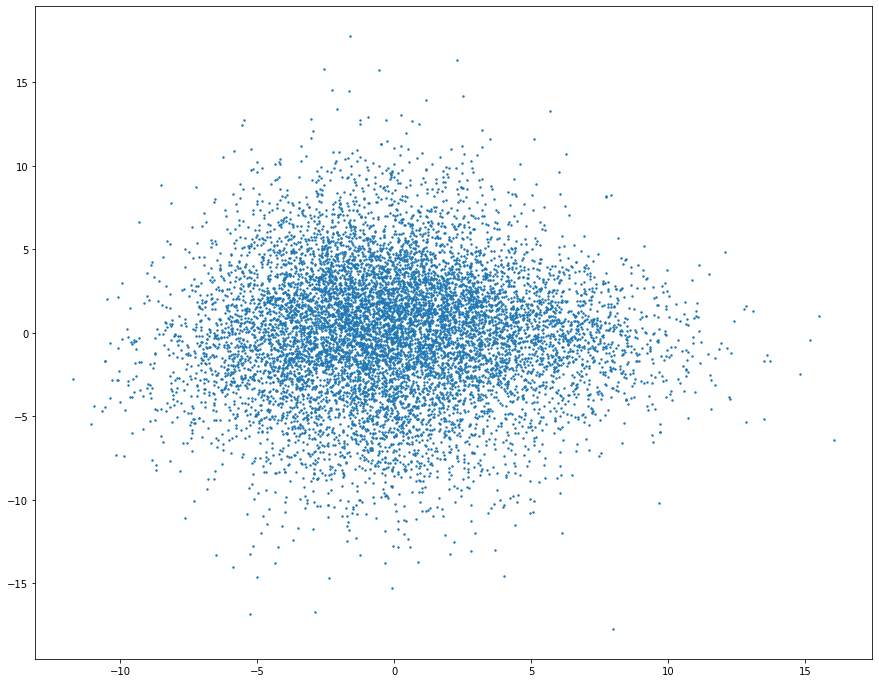

In [33]:
fig = matplotlib.pyplot.figure(figsize=(15, 12))
matplotlib.pyplot.scatter(pca_data[:, 1], pca_data[:, 0], s=2)